# Pandas is a powerful Python library for data manipulation and analysis. Here are some fundamental concepts:

# Data Structures: Series and DataFrame

# 1.Series

In [44]:
#Series:

#A one-dimensional array-like object.
#It can hold any data type.
#Has an associated array of data labels called an index.

In [45]:
import pandas as pd

# Creating a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


# 2.DataFrame:

In [ ]:
#A two-dimensional tabular data structure.
#It consists of rows and columns.
#Can be thought of as a collection of Series.

In [46]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['New York', 'San Francisco', 'Los Angeles']
})
print(df)

      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   22    Los Angeles


In [12]:
import pandas as pd
import numpy as np

# Creating a DataFrame with dummy data
data = {
    'StudentID': np.arange(1, 11),
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Age': np.random.randint(18, 25, size=10),
    'Gender': np.random.choice(['Male', 'Female'], size=10),
    'Score': np.random.uniform(60, 100, size=10)
}

students_df = pd.DataFrame(data)

# Displaying the DataFrame
print("Original DataFrame:")
print(students_df)


Original DataFrame:
   StudentID     Name  Age  Gender      Score
0          1    Alice   23  Female  64.025577
1          2      Bob   23  Female  60.877944
2          3  Charlie   20    Male  87.975110
3          4    David   24    Male  99.811765
4          5     Emma   20  Female  65.231794
5          6    Frank   21  Female  64.051845
6          7    Grace   24  Female  97.676045
7          8     Hank   19  Female  81.629984
8          9      Ivy   22  Female  74.485134
9         10     Jack   22    Male  88.384574


# basic data analysis concepts:

# 1.Exploring the DataFrame:

In [23]:
# Display the first few rows of the DataFrame
print("\nFirst few rows:")
print(students_df.head())

# Get information about the DataFrame
print("\nData types and missing values:")
print(students_df.info())

# Get basic statistics of numerical columns
print("\nBasic statistics:")
print(students_df.describe())



First few rows:
   StudentID     Name   Age  Gender      Score
0          1    Alice  23.0  Female  64.025577
1          2      Bob  23.0  Female        NaN
2          3  Charlie  20.0    Male  87.975110
3          4    David   NaN    Male  99.811765
4          5     Emma  20.0  Female  65.231794

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  10 non-null     int32  
 1   Name       10 non-null     object 
 2   Age        9 non-null      float64
 3   Gender     10 non-null     object 
 4   Score      9 non-null      float64
dtypes: float64(2), int32(1), object(2)
memory usage: 488.0+ bytes
None

Basic statistics:
       StudentID        Age      Score
count   10.00000   9.000000   9.000000
mean     5.50000  21.555556  80.363537
std      3.02765   1.666667  14.134881
min      1.00000  19.000000  64.025577
25

# 2. Handling Missing Values:

In [29]:
# Introduce some missing values
students_df.loc[1, 'Score'] = np.nan
students_df.loc[3, 'Age'] = np.nan



In [ ]:
# Drop rows with missing values
students_df_cleaned = students_df.dropna()



In [31]:
students_df_cleaned

,StudentID,Name,Age,Gender,Score
0,1,Alice,23.0,Female,64.025577
2,3,Charlie,20.0,Male,87.975110
4,5,Emma,20.0,Female,65.231794
5,6,Frank,21.0,Female,64.051845
6,7,Grace,24.0,Female,97.676045
7,8,Hank,19.0,Female,81.629984
8,9,Ivy,22.0,Female,74.485134
9,10,Jack,22.0,Male,88.384574


In [33]:
# Select only numeric columns for filling missing values
numeric_columns = students_df.select_dtypes(include=[np.number]).columns
students_df_filled = students_df.fillna(students_df[numeric_columns].mean())


In [34]:
students_df_filled 

,StudentID,Name,Age,Gender,Score
0,1,Alice,23.000000,Female,64.025577
1,2,Bob,23.000000,Female,80.363537
2,3,Charlie,20.000000,Male,87.975110
3,4,David,21.555556,Male,99.811765
4,5,Emma,20.000000,Female,65.231794
5,6,Frank,21.000000,Female,64.051845
6,7,Grace,24.000000,Female,97.676045
7,8,Hank,19.000000,Female,81.629984
8,9,Ivy,22.000000,Female,74.485134
9,10,Jack,22.000000,Male,88.384574


# 3.Data Selection and Filtering:

In [35]:
# Select specific columns
selected_columns = students_df[['Name', 'Score']]

In [36]:
selected_columns 

,Name,Score
0,Alice,64.025577
1,Bob,NaN
2,Charlie,87.975110
3,David,99.811765
4,Emma,65.231794
5,Frank,64.051845
6,Grace,97.676045
7,Hank,81.629984
8,Ivy,74.485134
9,Jack,88.384574


In [42]:
# Filter data based on a condition
high_score_students = [students_df['Score'] > 80]


In [38]:
high_score_students

,StudentID,Name,Age,Gender,Score
2,3,Charlie,20.0,Male,87.975110
3,4,David,NaN,Male,99.811765
6,7,Grace,24.0,Female,97.676045
7,8,Hank,19.0,Female,81.629984
9,10,Jack,22.0,Male,88.384574


# 4.Grouping and Aggregation:

In [48]:
# Group by gender and calculate mean age for each group
avg_age_by_gender = students_df.groupby('Gender')['Age'].mean()

In [49]:
avg_age_by_gender

Gender
Female    21.714286
Male      21.000000
Name: Age, dtype: float64

# 5.Visualization:

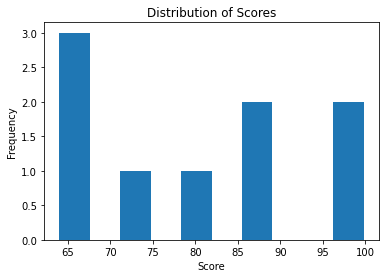

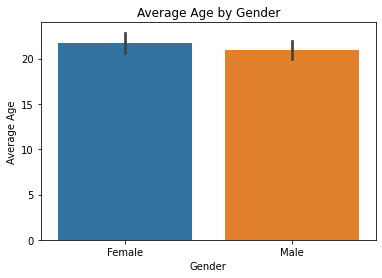

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of scores
plt.hist(students_df['Score'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

# Create a bar plot of average age by gender
sns.barplot(x='Gender', y='Age', data=students_df)
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age by Gender')
plt.show()
